In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, roc_auc_score

In [2]:
raw = pd.read_csv("/kaggle/input/santander-customer-transaction-prediction/train.csv")

In [3]:
df = raw.copy()
df.drop("ID_code", axis=1, inplace=True)

In [4]:
df.head()
df.shape

(200000, 201)

In [5]:
df.dtypes.value_counts()

float64    200
int64        1
Name: count, dtype: int64

In [6]:
df["target"].dtype
null_count = sum(df.isnull().any())
df.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [7]:
df_min = min(df.drop("target", axis=1).min()) 
df_max = max(df.drop("target", axis=1).max())

In [8]:
obs_total = df.shape[0]
obs_0 = df["target"].value_counts()[0]
obs_1 = df["target"].value_counts()[1]

pct_0 = round(obs_0/obs_total,4)*100
pct_1 = round(obs_1/obs_total, 4)*100

print("There are {:,} observations with target value 0, and {:,} with target value 1".format(obs_0, obs_1))
print("Target 0 represents {}% of the total, while target 1 represents {}%".format(pct_0, pct_1))

There are 179,902 observations with target value 0, and 20,098 with target value 1
Target 0 represents 89.95% of the total, while target 1 represents 10.05%


<ipython-input-9-b58b680902b3>:2: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df.boxplot(["var_5", "var_43", "var_112", "var_189", "var_120", "var_34", "var_37", "var_199"], by="target", grid=False, ax=ax);


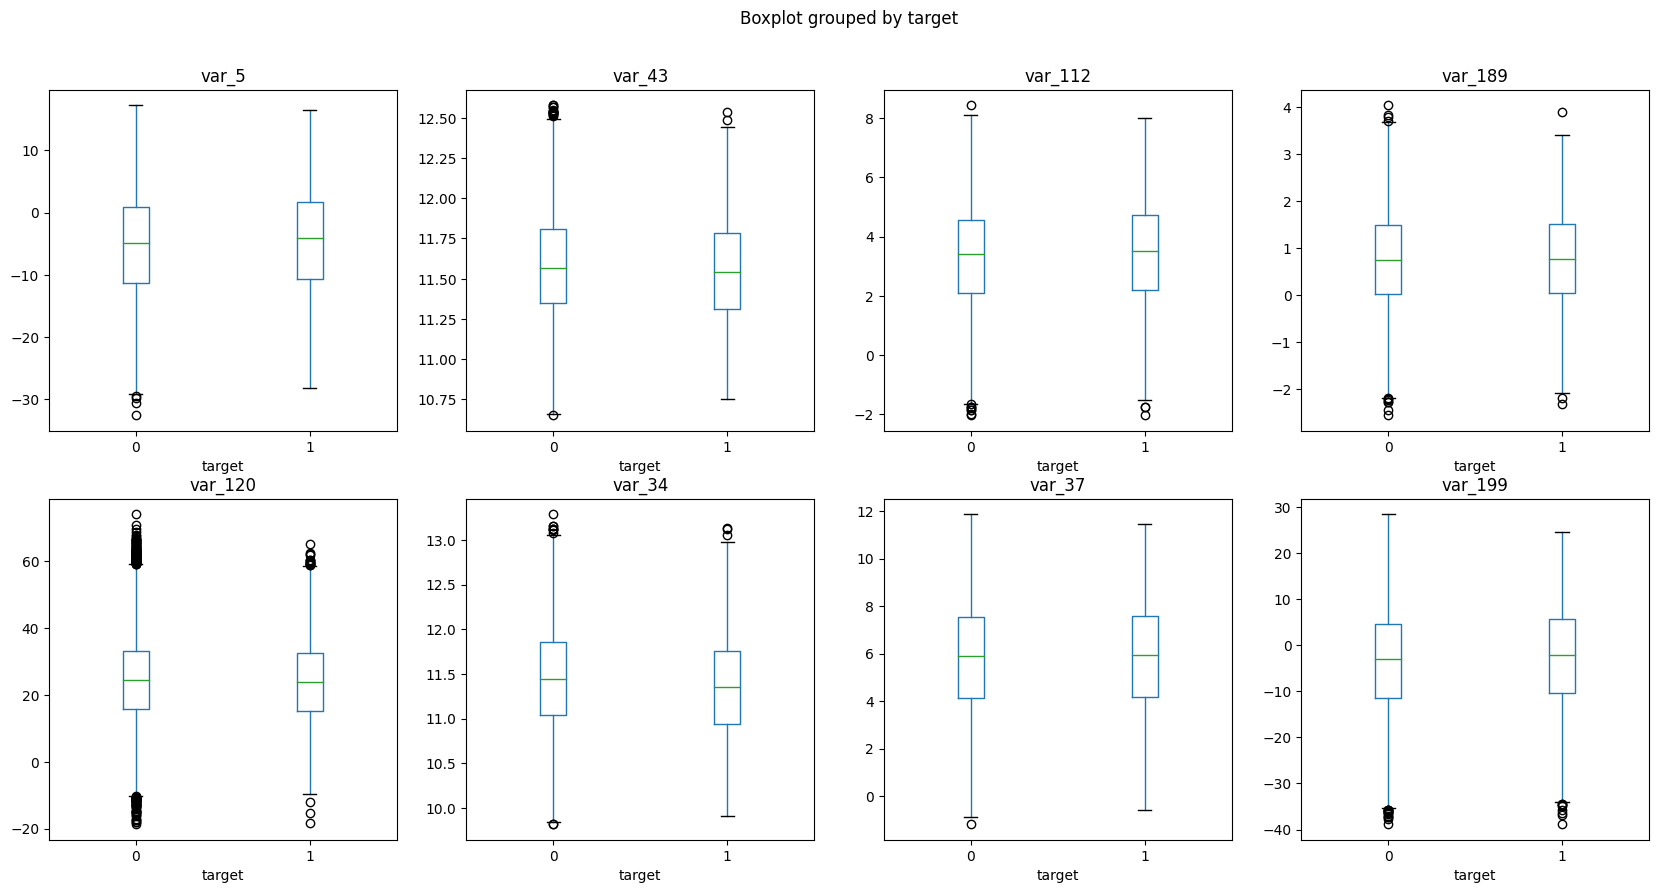

In [9]:
fig, ax = plt.subplots(2,4,figsize=(20,10), sharey=False);
df.boxplot(["var_5", "var_43", "var_112", "var_189", "var_120", "var_34", "var_37", "var_199"], by="target", grid=False, ax=ax);

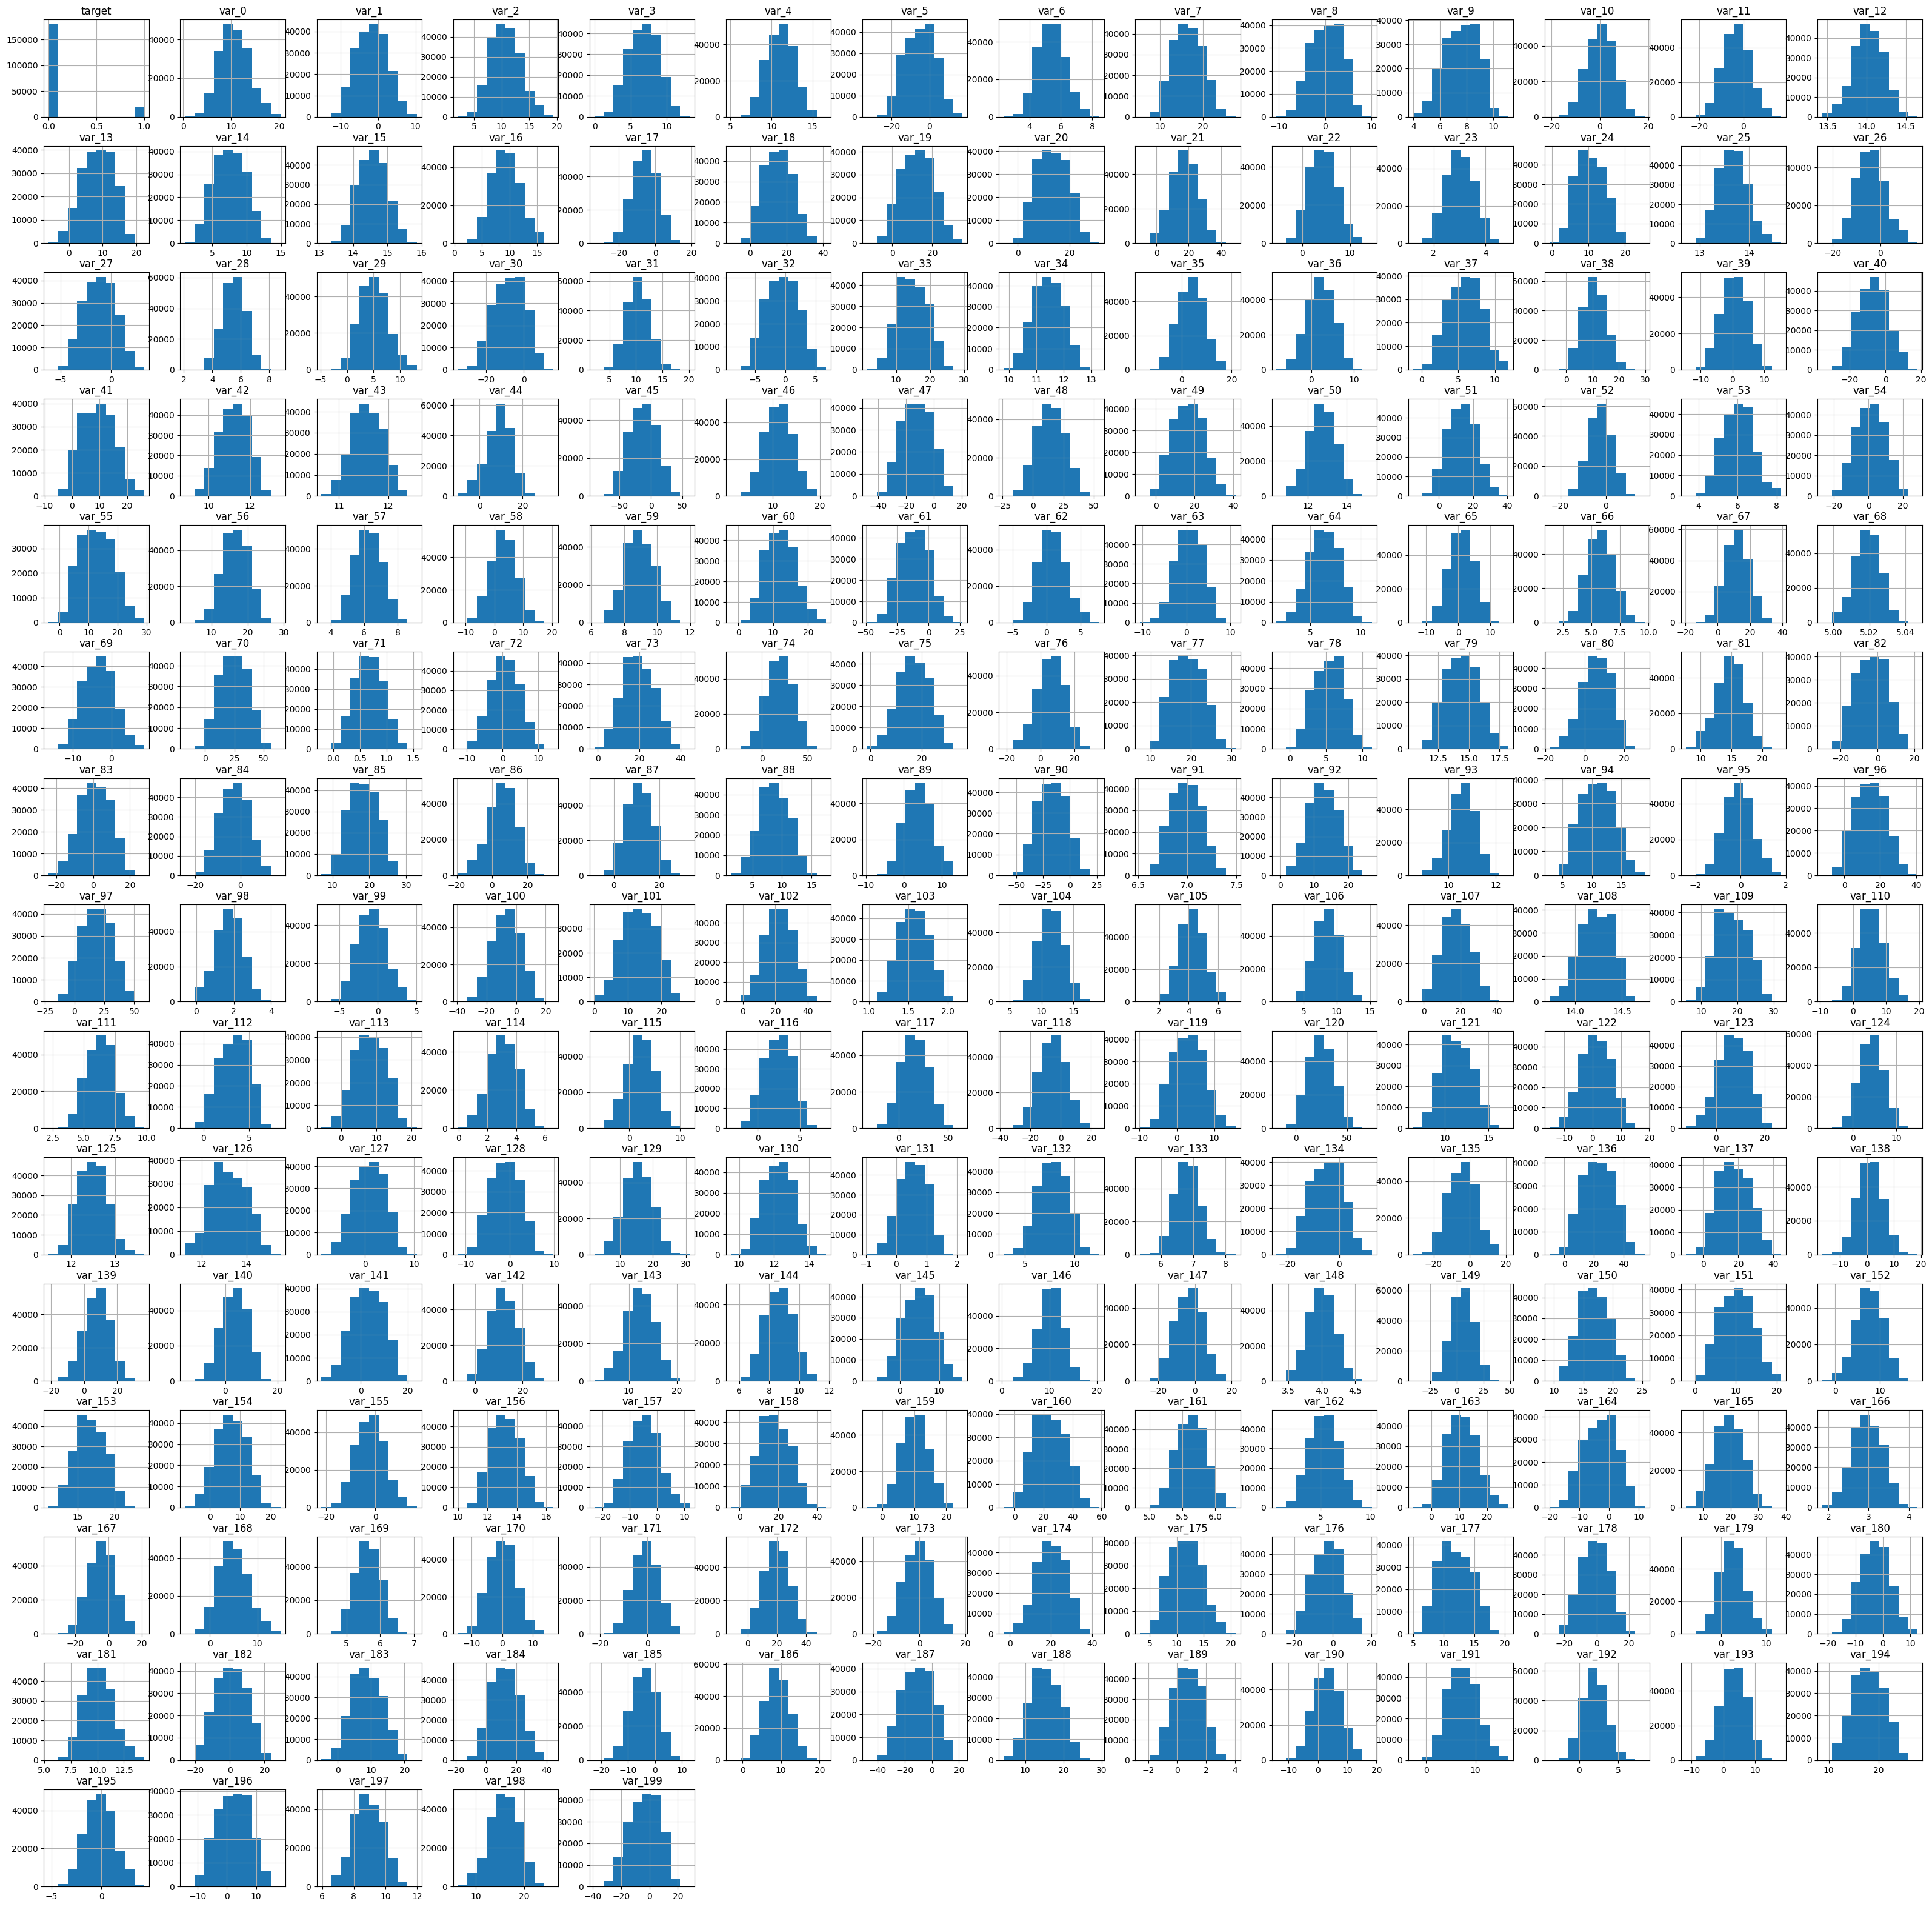

In [10]:
df.hist(figsize=(40,40));

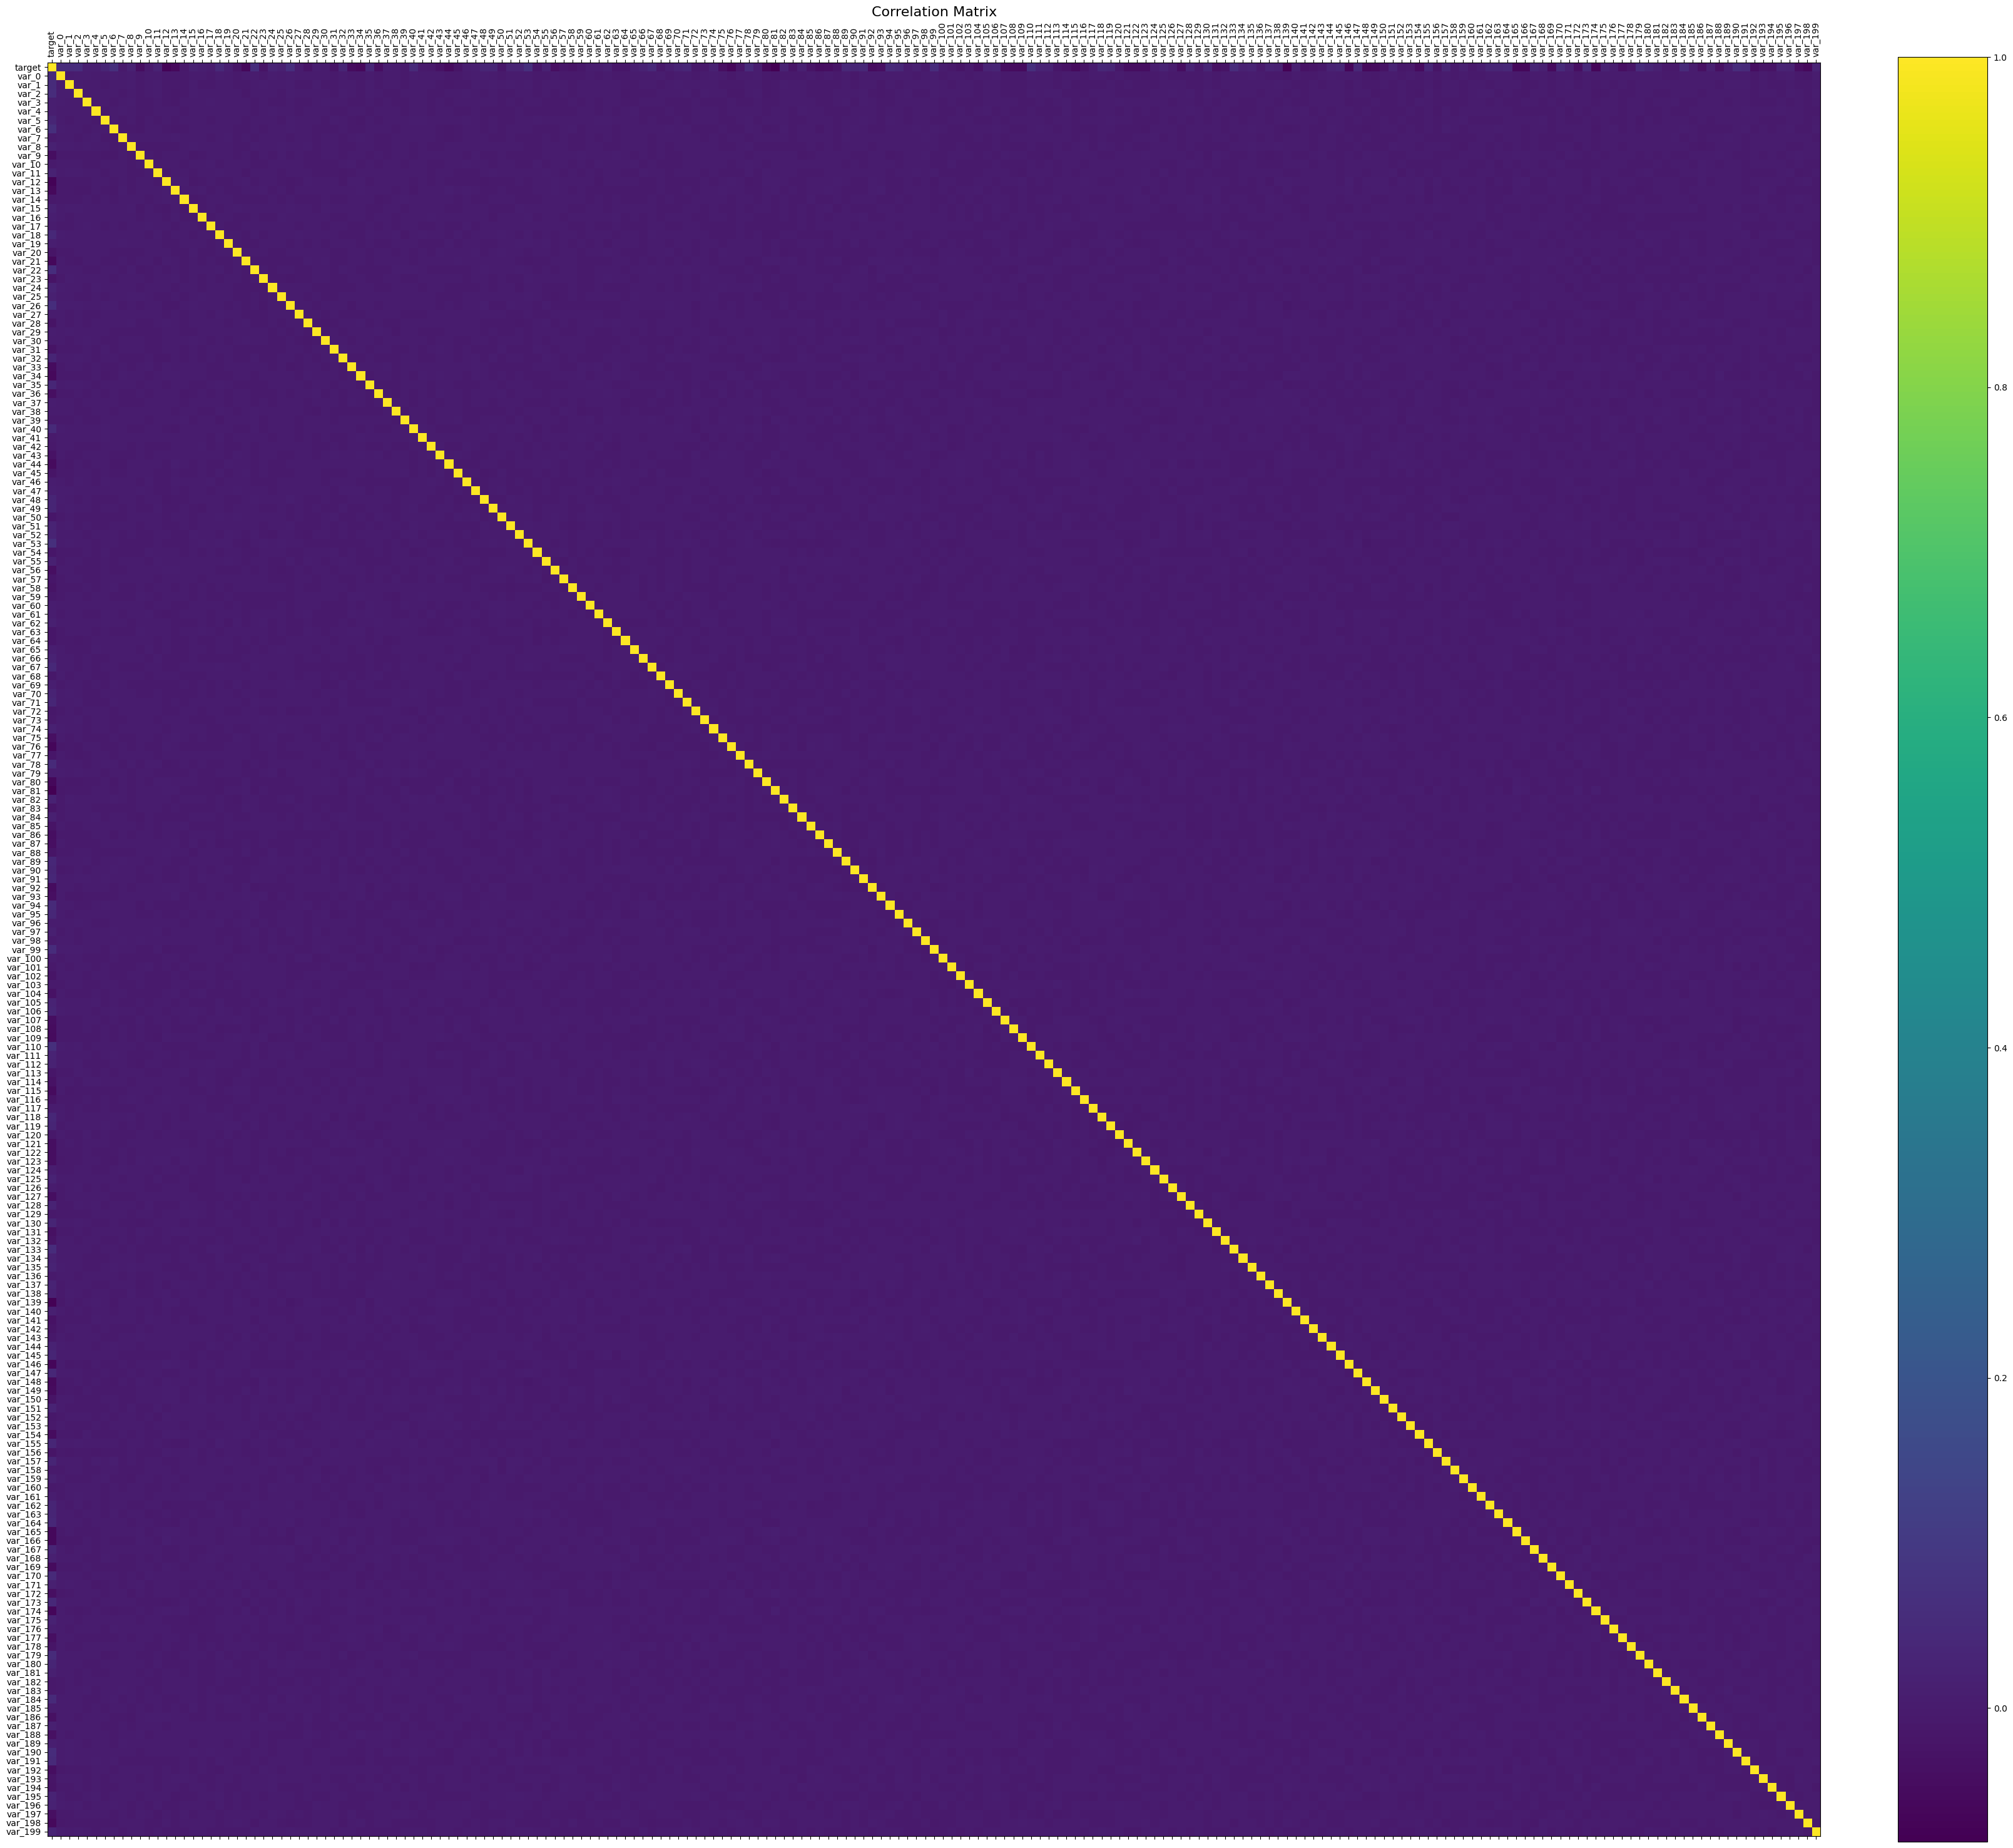

In [11]:
f = plt.figure(figsize=(40, 40))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, rotation=90)
plt.yticks(range(df.shape[1]), df.columns)
plt.colorbar(fraction=0.046, pad = 0.04)
plt.title('Correlation Matrix', fontsize=16);

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

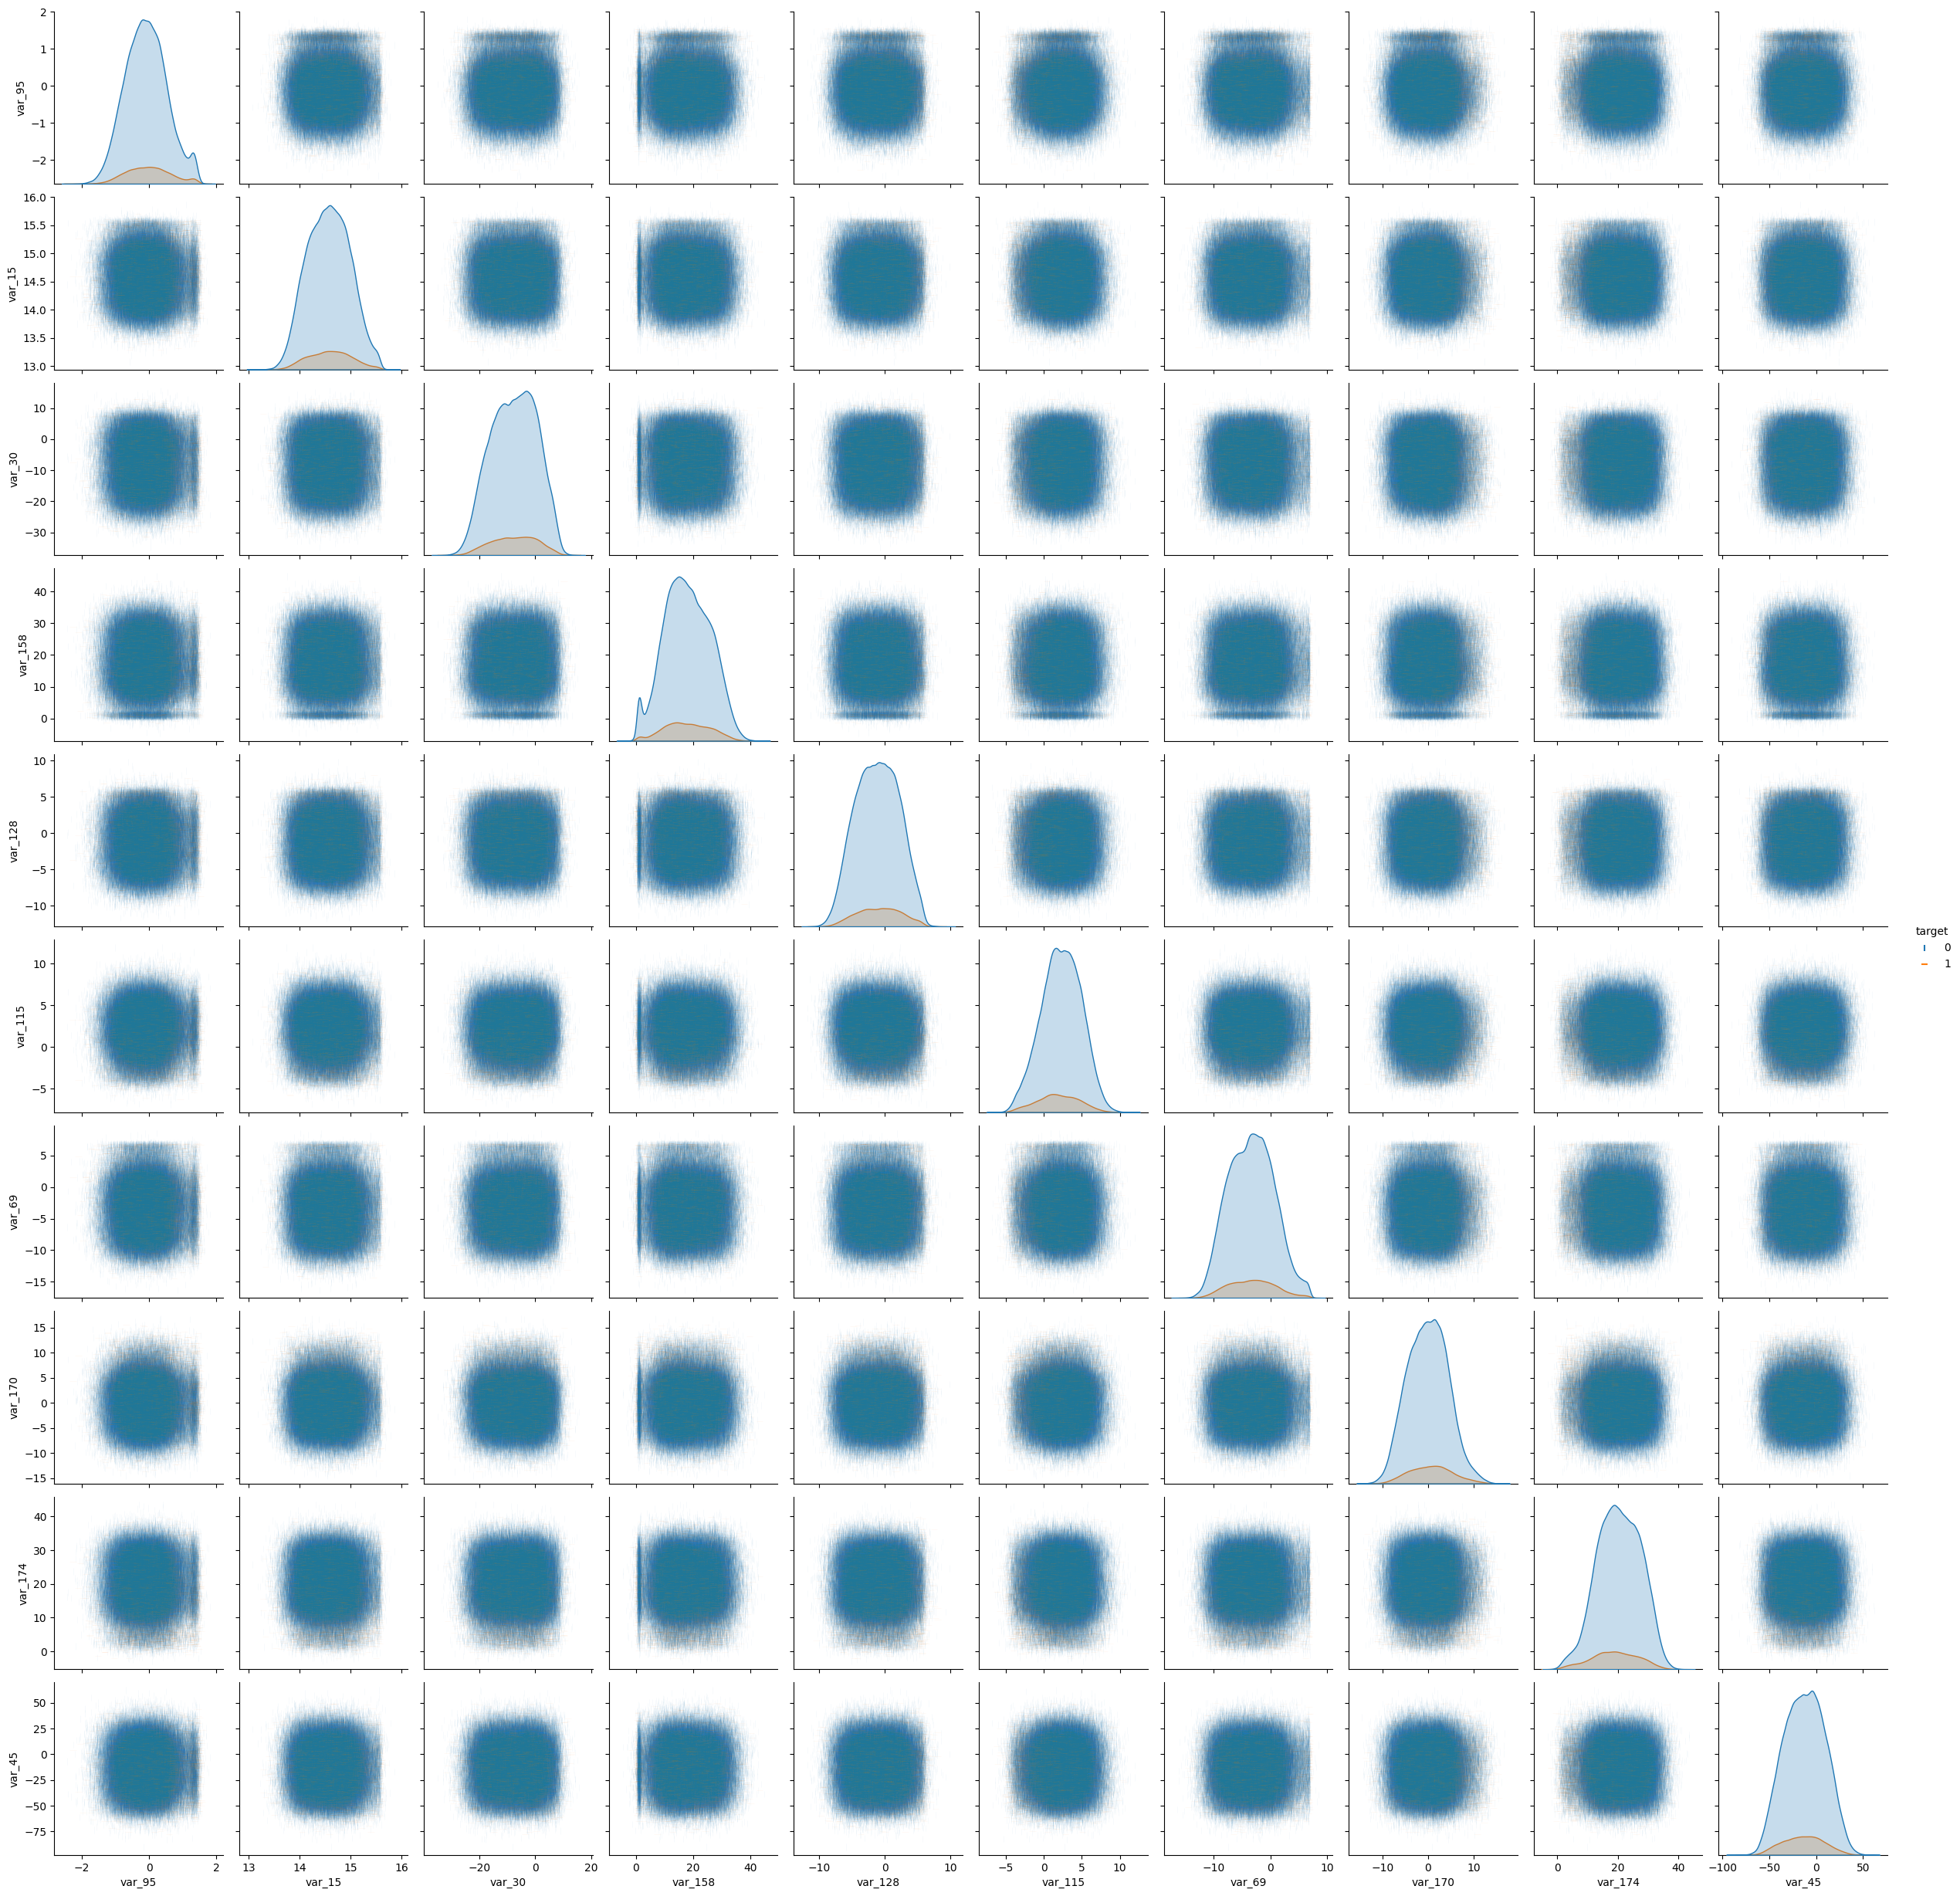

In [12]:
random_columns = df.drop("target", axis=1).sample(10, axis=1, random_state=42).columns.to_list()
sns.pairplot(df, vars=random_columns, hue="target", plot_kws={'alpha':0.05}, markers=['|','_']); # 0 is blue and 1 is orange

In [13]:
def identify_outliers(df):

  idx = []

  for col in df.columns:
    if not col == "target":
      std = df[col].std() 
      threshold = std * 3 
      idx_col = df[col][(df[col]>=abs(threshold)) | (df[col]<=-abs(threshold))].index.to_list()
      idx.append(idx_col)
  
  idx_flat = list(set([i for j in idx for i in j]))

  return idx_flat

In [14]:
outliers_idx = identify_outliers(df)
len(outliers_idx)

200000

In [15]:
sc = StandardScaler()
df_sc = pd.DataFrame(sc.fit_transform(df.drop("target", axis=1)))
df_sc.columns = df.drop("target", axis=1).columns
df_sc["target"] = df["target"].copy()

In [16]:
df_0_downsampled = df_sc[df_sc["target"]==0].sample(len(df_sc[df_sc["target"]==1]), random_state=42)
df_1 = df_sc[df_sc["target"]==1]

df_downsampled = pd.concat([df_1, df_0_downsampled], ignore_index=True)

In [17]:
X = df_downsampled.drop("target", axis=1)
y = df_downsampled["target"]

In [18]:
np.random.seed(42)

models = {"Logistic Regression":LogisticRegression(),
          "Random Tree Classifier":RandomForestClassifier(),
          "Gaussian Naive Bayes":GaussianNB()
         }
results = dict()

for model in models:
  print("Fitting {}...".format(model), end = " ")
  scores = cross_val_score(models[model], X, y, cv=10, scoring = "roc_auc", n_jobs = -1)
  results[model] = scores
  score = scores.mean()
  print("Done! Mean AUC score: {}".format(score))

Fitting Logistic Regression... Done! Mean AUC score: 0.8591671323996348
Fitting Random Tree Classifier... Done! Mean AUC score: 0.8219968924584796
Fitting Gaussian Naive Bayes... Done! Mean AUC score: 0.8874792733212905


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [20]:
pred_test = gnb.predict(X_test)
print("Test AUC: {}".format(roc_auc_score(y_test, pred_test)))
print("Test Recall: {}".format(recall_score(y_test, pred_test)))
print("Test Precission: {}".format(precision_score(y_test, pred_test)))
print("Test Accuracy: {}".format(accuracy_score(y_test, pred_test)))

Test AUC: 0.8081077893276668
Test Recall: 0.8113254823352544
Test Precission: 0.8038728897715988
Test Accuracy: 0.8080845771144278


In [21]:
df_test = pd.read_csv("/kaggle/input/santander-customer-transaction-prediction/test.csv")
gnb_kaggle = GaussianNB()
gnb_kaggle.fit(X, y)

kaggle_X_test = sc.transform(df_test.drop("ID_code", axis=1))

kaggle_pred = gnb_kaggle.predict(kaggle_X_test)

submission = pd.DataFrame()
submission["ID_code"] = df_test["ID_code"].copy()
submission["target"] = kaggle_pred

submission.to_csv("kaggle_santander_transactions_submission.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
